In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [160]:
# Load dataset
file_path = "C:/Users/prasa/Desktop/micrOrbitals/real-estate price prediction/dataset-1/Real estate.csv"
data = pd.read_csv(file_path)


In [161]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [162]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [163]:
# Check for missing values
print(data.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [164]:
# Display the number of entries and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [165]:
# Drop the 'No' column if exists
data.drop(columns=['No'], inplace=True, errors='ignore')


In [166]:
# Rename columns
data.columns = [
    'transaction_date', 'house_age', 'distance_to_mrt',
    'num_convenience_stores', 'latitude', 'longitude', 'house_price'
]


In [167]:
# Convert transaction_date to a datetime feature
data['transaction_year'] = pd.to_datetime(data['transaction_date']).dt.year
data.drop(columns=['transaction_date'], inplace=True)

In [168]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [169]:
# Drop rows with NaN values
data.dropna(inplace=True)

In [170]:
# Define features and target variable
selected_features = ['house_age', 'distance_to_mrt', 'num_convenience_stores', 'latitude', 'longitude', 'transaction_year']
X = data[selected_features]
y = data['house_price']

In [171]:
# Initialize the scaler
scaler = StandardScaler()


In [172]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
# Initialize the model
model = LinearRegression()


In [175]:
# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

In [176]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [177]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [178]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 54.58094520086212
Root Mean Squared Error: 7.387891796775459
R^2 Score: 0.6746481382828176


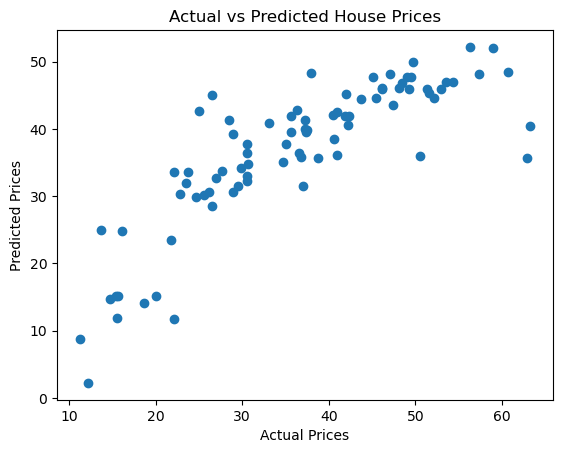

In [179]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [180]:
# Calculate correlation matrix
correlation_matrix = data.corr()


In [181]:
# Suppress specific warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


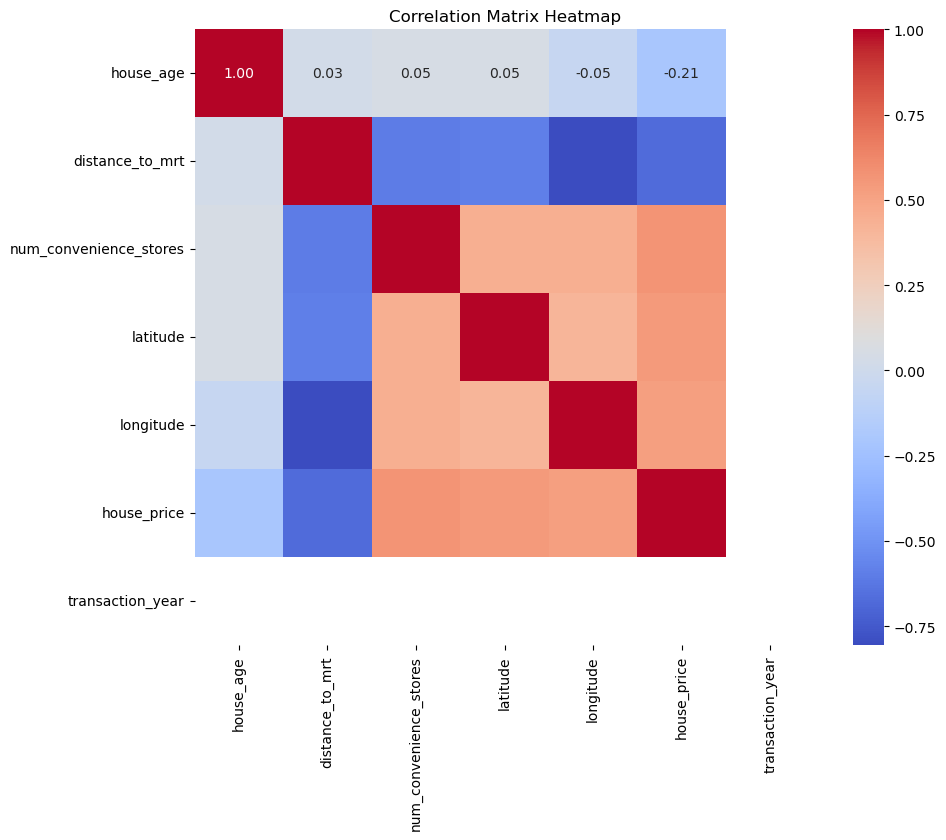

In [182]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [183]:
# Identify strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong Correlations:")
print(strong_correlations)

Strong Correlations:
                        house_age  distance_to_mrt  num_convenience_stores  \
house_age                     1.0              NaN                     NaN   
distance_to_mrt               NaN         1.000000               -0.602519   
num_convenience_stores        NaN        -0.602519                1.000000   
latitude                      NaN        -0.591067                     NaN   
longitude                     NaN        -0.806317                     NaN   
house_price                   NaN        -0.673613                0.571005   
transaction_year              NaN              NaN                     NaN   

                        latitude  longitude  house_price  transaction_year  
house_age                    NaN        NaN          NaN               NaN  
distance_to_mrt        -0.591067  -0.806317    -0.673613               NaN  
num_convenience_stores       NaN        NaN     0.571005               NaN  
latitude                1.000000        NaN   

In [184]:
# Identify strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Strong Correlations:")
print(strong_correlations)

# Function to predict house price
def predict_house_price(features, model, scaler):
    # Scale the input features
    features_scaled = scaler.transform([features])
    
    # Predict the house price
    predicted_price = model.predict(features_scaled)
    
    return predicted_price[0]

Strong Correlations:
                        house_age  distance_to_mrt  num_convenience_stores  \
house_age                     1.0              NaN                     NaN   
distance_to_mrt               NaN         1.000000               -0.602519   
num_convenience_stores        NaN        -0.602519                1.000000   
latitude                      NaN        -0.591067                     NaN   
longitude                     NaN        -0.806317                     NaN   
house_price                   NaN        -0.673613                0.571005   
transaction_year              NaN              NaN                     NaN   

                        latitude  longitude  house_price  transaction_year  
house_age                    NaN        NaN          NaN               NaN  
distance_to_mrt        -0.591067  -0.806317    -0.673613               NaN  
num_convenience_stores       NaN        NaN     0.571005               NaN  
latitude                1.000000        NaN   

In [185]:
# Function to predict house price
def predict_house_price(features, model, scaler):
    # Scale the input features
    try:
        features_scaled = scaler.transform([features])
        # Predict the house price
        predicted_price = model.predict(features_scaled)
        return predicted_price[0]
    except Exception as e:
        print(f"Error in predicting house price: {e}")
        return None

In [186]:
def get_user_input_and_predict():
    try:
        # Prompt the user to enter values for house_age, distance_to_mrt, num_convenience_stores, latitude, longitude, transaction_year
        house_age = float(input("Enter house age: "))
        distance_to_mrt = float(input("Enter distance to MRT (in meters): "))
        num_convenience_stores = int(input("Enter number of convenience stores: "))
        latitude = float(input("Enter latitude: "))
        longitude = float(input("Enter longitude: "))
        transaction_year = int(input("Enter transaction year: "))
        
        # Prepare the user input for prediction
        user_input = [house_age, distance_to_mrt, num_convenience_stores, latitude, longitude, transaction_year]
        print(f"User input: {user_input}")  # Debugging: print user input
        
        # Predict the house price
        predicted_price = predict_house_price(user_input, model, scaler)
        if predicted_price is not None:
            print(f"Predicted house price: ${predicted_price:,.2f}")
        else:
            print("Failed to predict house price.")
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter the correct values for all parameters.")

# Call the function to get user input and predict house price
get_user_input_and_predict()

Enter house age: 10
Enter distance to MRT (in meters): 374.485
Enter number of convenience stores: 4
Enter latitude: 2743.57
Enter longitude: 2493.38
Enter transaction year: 2012
User input: [10.0, 374.485, 4, 2743.57, 2493.38, 2012]
Predicted house price: $585,189.57


C:\Users\prasa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
